# 4. (a) (20 points)

In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

import math
from qiskit.tools.visualization import plot_histogram

In [2]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

## actually the same

In [3]:
circuit = QuantumCircuit(q, c)
circuit.h(q[2])
circuit.cswap(q[2], q[0], q[1])
circuit.h(q[2])
circuit.x(q[2])

circuit.draw()

q0_0: ──────X───────────
            │           
q0_1: ──────X───────────
      ┌───┐ │ ┌───┐┌───┐
q0_2: ┤ H ├─■─┤ H ├┤ X ├
      └───┘   └───┘└───┘
c0: 3/══════════════════

Statevector([4.26642159e-17+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
             0.00000000e+00+0.j, 1.00000000e+00+0.j, 0.00000000e+00+0.j,
             0.00000000e+00+0.j, 0.00000000e+00+0.j],
            dims=(2, 2, 2))


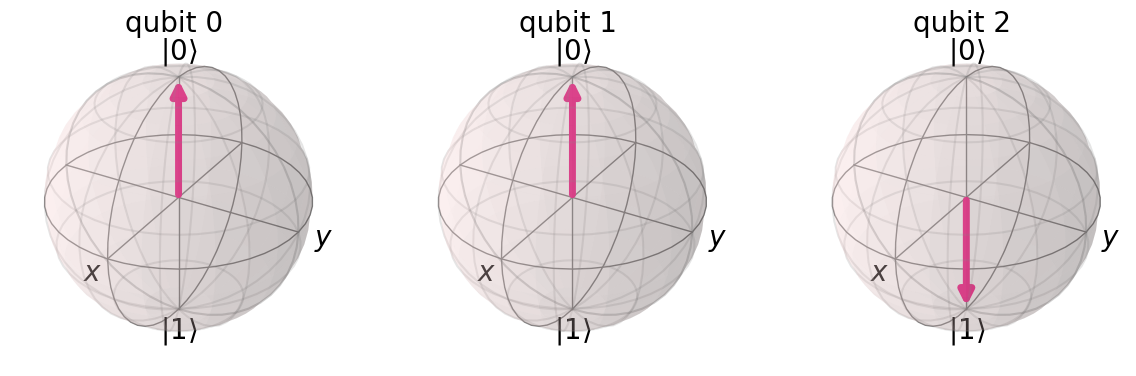

In [4]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

In [5]:
circuit.measure(q[2], c[2])
circuit.draw()

q0_0: ──────X──────────────
            │              
q0_1: ──────X──────────────
      ┌───┐ │ ┌───┐┌───┐┌─┐
q0_2: ┤ H ├─■─┤ H ├┤ X ├┤M├
      └───┘   └───┘└───┘└╥┘
c0: 3/═══════════════════╩═
                         2

{'100': 1024}


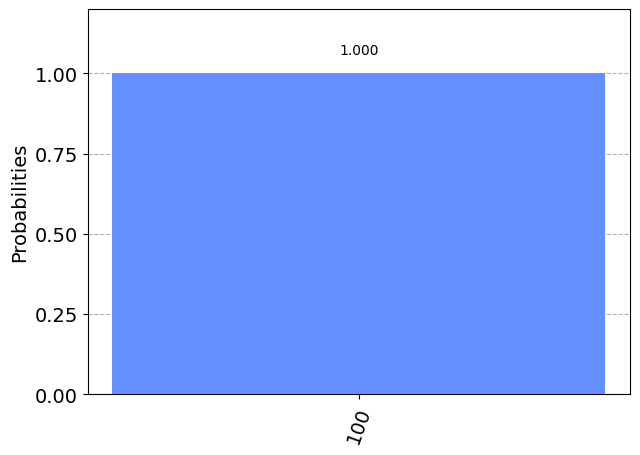

In [6]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

## not the same

In [7]:
circuit = QuantumCircuit(q, c)

circuit.ry(math.pi/2.5, q[1])

circuit.h(q[2])
circuit.cswap(q[2], q[0], q[1])
circuit.h(q[2])
circuit.x(q[2])

circuit.draw()

q0_0: ─────────────X───────────
      ┌──────────┐ │           
q0_1: ┤ Ry(2π/5) ├─X───────────
      └──┬───┬───┘ │ ┌───┐┌───┐
q0_2: ───┤ H ├─────■─┤ H ├┤ X ├
         └───┘       └───┘└───┘
c0: 3/═════════════════════════

Statevector([-3.59435526e-18+0.j, -2.93892626e-01+0.j,  2.93892626e-01+0.j,
              0.00000000e+00+0.j,  8.09016994e-01+0.j,  2.93892626e-01+0.j,
              2.93892626e-01+0.j,  0.00000000e+00+0.j],
            dims=(2, 2, 2))


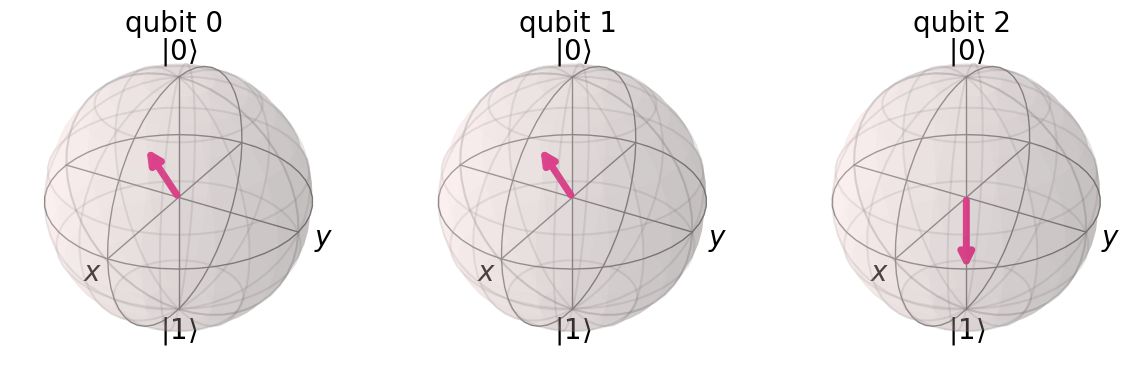

In [8]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

In [9]:
circuit.measure(q[2], c[2])
circuit.draw()

q0_0: ─────────────X──────────────
      ┌──────────┐ │              
q0_1: ┤ Ry(2π/5) ├─X──────────────
      └──┬───┬───┘ │ ┌───┐┌───┐┌─┐
q0_2: ───┤ H ├─────■─┤ H ├┤ X ├┤M├
         └───┘       └───┘└───┘└╥┘
c0: 3/══════════════════════════╩═
                                2

{'100': 856, '000': 168}


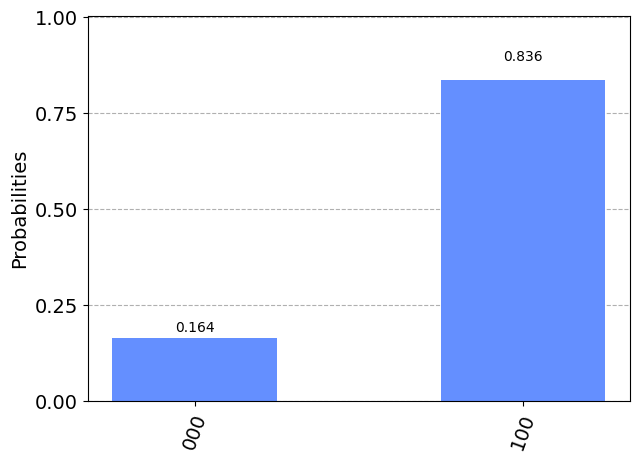

In [10]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

## orthogonal

In [11]:
circuit = QuantumCircuit(q, c)

circuit.x(q[1])

circuit.h(q[2])
circuit.cswap(q[2], q[0], q[1])
circuit.h(q[2])
circuit.x(q[2])

circuit.draw()

q0_0: ──────X───────────
      ┌───┐ │           
q0_1: ┤ X ├─X───────────
      ├───┤ │ ┌───┐┌───┐
q0_2: ┤ H ├─■─┤ H ├┤ X ├
      └───┘   └───┘└───┘
c0: 3/══════════════════

Statevector([ 0. +0.j, -0.5+0.j,  0.5+0.j,  0. +0.j,  0. +0.j,  0.5+0.j,
              0.5+0.j,  0. +0.j],
            dims=(2, 2, 2))


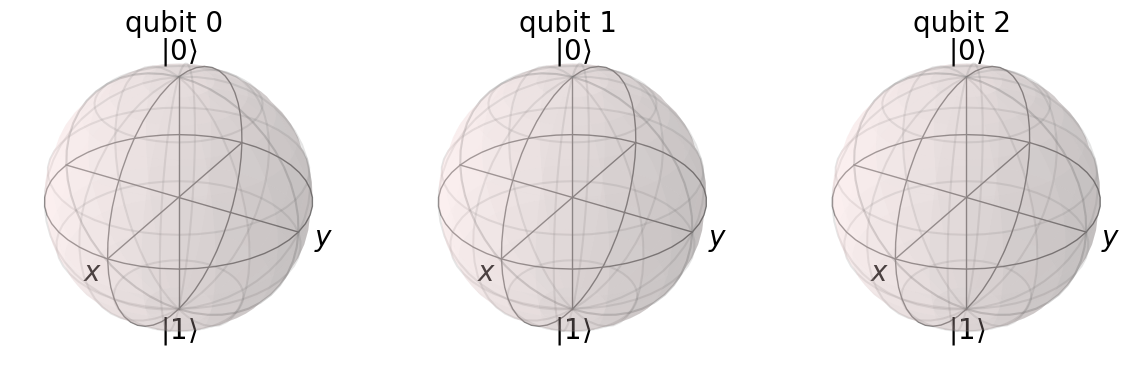

In [12]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

In [13]:
circuit.measure(q[2], c[2])
circuit.draw()

q0_0: ──────X──────────────
      ┌───┐ │              
q0_1: ┤ X ├─X──────────────
      ├───┤ │ ┌───┐┌───┐┌─┐
q0_2: ┤ H ├─■─┤ H ├┤ X ├┤M├
      └───┘   └───┘└───┘└╥┘
c0: 3/═══════════════════╩═
                         2

{'000': 504, '100': 520}


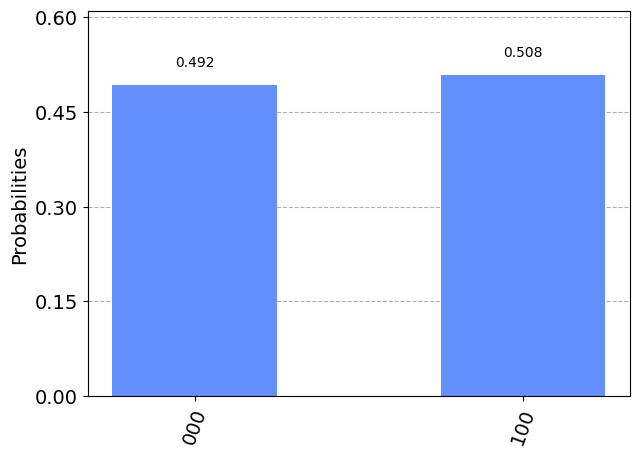

In [14]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

## indeed the same

In [15]:
circuit = QuantumCircuit(q, c)

circuit.h(q[0])
circuit.x(q[0])
circuit.h(q[1])
circuit.y(q[1])
circuit.z(q[1])

circuit.h(q[2])
circuit.cswap(q[2], q[0], q[1])
circuit.h(q[2])
circuit.x(q[2])

circuit.draw()

┌───┐┌───┐                  
q0_0: ┤ H ├┤ X ├──────X───────────
      ├───┤├───┤┌───┐ │           
q0_1: ┤ H ├┤ Y ├┤ Z ├─X───────────
      ├───┤└───┘└───┘ │ ┌───┐┌───┐
q0_2: ┤ H ├───────────■─┤ H ├┤ X ├
      └───┘             └───┘└───┘
c0: 3/════════════════════════════

Statevector([ 7.24144456e-35+1.79202035e-17j,
              7.24144456e-35+1.79202035e-17j,
              7.24144456e-35+1.79202035e-17j,
              7.24144456e-35+1.79202035e-17j,
             -9.18485099e-17-5.00000000e-01j,
             -9.18485099e-17-5.00000000e-01j,
             -9.18485099e-17-5.00000000e-01j,
             -9.18485099e-17-5.00000000e-01j],
            dims=(2, 2, 2))


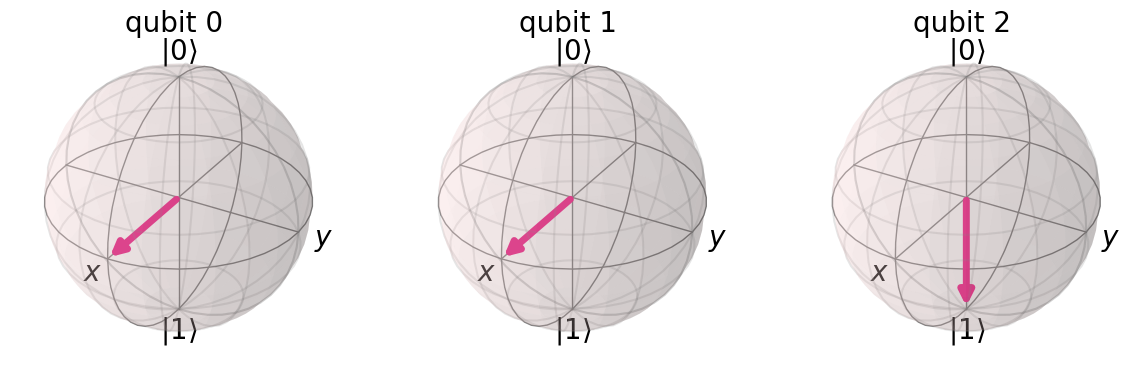

In [16]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

In [17]:
circuit.measure(q[2], c[2])
circuit.draw()

┌───┐┌───┐                     
q0_0: ┤ H ├┤ X ├──────X──────────────
      ├───┤├───┤┌───┐ │              
q0_1: ┤ H ├┤ Y ├┤ Z ├─X──────────────
      ├───┤└───┘└───┘ │ ┌───┐┌───┐┌─┐
q0_2: ┤ H ├───────────■─┤ H ├┤ X ├┤M├
      └───┘             └───┘└───┘└╥┘
c0: 3/═════════════════════════════╩═
                                   2

{'100': 1024}


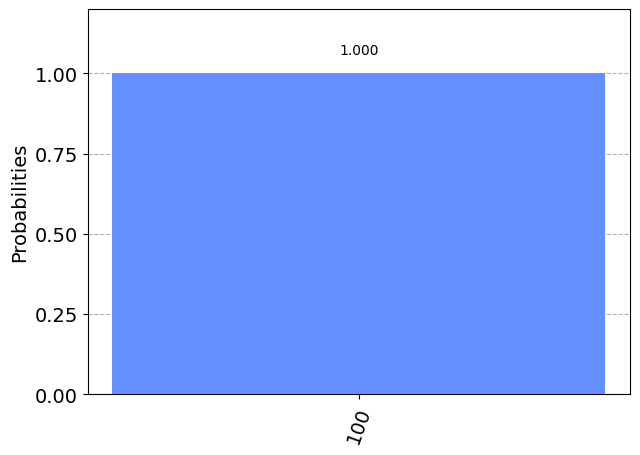

In [18]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)